In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install statsmodels
# !pip install sklearn

You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle

In [34]:
from statsmodels.api import OLS
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [4]:
with open('dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [74]:
new_data = data['MutantApeYachtClub'].copy()
new_data = new_data.dropna()
new_data.head()

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol
1,2021-08-30,42150.432895,0.000000,32023.800781,4.611257e+07,3.916317e+06,20522.01,1094,7503.0,2.0,46.0,47054.984375,31847007016,3224.374268,19306924485,110.544807,5274104165,-1774.847656,-2.628418,16.075134
2,2021-08-31,34728.502238,0.000000,28324.003906,1.972579e+07,7.019255e+06,20522.01,568,7693.0,3.0,24.0,47166.687500,34730363427,3433.732666,27280502987,108.483772,7590894022,111.703125,209.358398,-2.061035
3,2021-09-01,34049.167712,1848.198730,24513.210938,1.637765e+07,2.655862e+07,20522.01,481,7793.0,6.0,42.0,48847.027344,39139399125,3834.828125,30070890104,111.033005,3974443896,1680.339844,401.095459,2.549232
4,2021-09-02,26299.774417,12414.097656,22857.037109,1.041471e+07,1.794458e+08,20522.01,396,7933.0,9.0,21.0,49327.722656,39508070319,3790.989990,24387397330,128.102386,5074399603,480.695312,-43.838135,17.069382
5,2021-09-03,27429.236859,16469.503906,23066.734375,7.159031e+06,2.389890e+08,20522.01,261,7992.0,3.0,32.0,50025.375000,43206179619,3940.614746,26207765094,146.583054,7526373837,697.652344,149.624756,18.480667


In [84]:
data['Otherdeed'].head()
data['Otherdeed'].dropna(axis=1, how='all', inplace=True)
data['Otherdeed'].head()

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol
0,2022-05-01,23289.890673,0.000000,20045.074219,1.697833e+08,2.389735e+05,7290,31476.0,17,8.000000,38469.093750,27002760110,2827.756104,15332730152,89.671509,1426749080,NaN,NaN,NaN
1,2022-05-02,28144.463557,0.000000,14212.331055,1.109455e+08,2.493893e+06,3942,33094.0,3,9.000000,38529.328125,32922642426,2857.410400,18609741545,87.581017,1265220129,60.234375,29.654297,-2.090492
2,2022-05-03,23819.450167,0.000000,12583.413086,3.923063e+07,1.252085e+06,1647,33520.0,4,2.000000,37750.453125,27326943244,2783.476318,13026093219,85.842377,1011988792,-778.875000,-73.934082,-1.738640
3,2022-05-04,23066.776050,0.000000,11631.999023,7.888837e+06,7.280967e+08,342,33825.0,72,2.000000,39698.371094,36754404490,2940.644775,18186749944,92.770851,1428455342,1947.917969,157.168457,6.928474
4,2022-05-05,38785.609587,9555.102539,12412.468262,5.352414e+06,8.607427e+08,138,33831.0,995,4.333333,36575.140625,43106256317,2749.213135,22642925048,84.596024,1805979399,-3123.230469,-191.431641,-8.174828


In [87]:
data['Otherdeed'].head()
data['Otherdeed'].dropna(axis=0, inplace=True)
data['Otherdeed'].head()

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol
1,2022-05-02,28144.463557,0.000000,14212.331055,1.109455e+08,2.493893e+06,3942,33094.000000,3,9.000000,38529.328125,32922642426,2857.410400,18609741545,87.581017,1265220129,60.234375,29.654297,-2.090492
2,2022-05-03,23819.450167,0.000000,12583.413086,3.923063e+07,1.252085e+06,1647,33520.000000,4,2.000000,37750.453125,27326943244,2783.476318,13026093219,85.842377,1011988792,-778.875000,-73.934082,-1.738640
3,2022-05-04,23066.776050,0.000000,11631.999023,7.888837e+06,7.280967e+08,342,33825.000000,72,2.000000,39698.371094,36754404490,2940.644775,18186749944,92.770851,1428455342,1947.917969,157.168457,6.928474
4,2022-05-05,38785.609587,9555.102539,12412.468262,5.352414e+06,8.607427e+08,138,33831.000000,995,4.333333,36575.140625,43106256317,2749.213135,22642925048,84.596024,1805979399,-3123.230469,-191.431641,-8.174828
5,2022-05-06,18947.476533,10.447601,11471.645508,2.292645e+06,9.411408e+05,121,33725.333333,1214,2.777778,36040.921875,37795577489,2694.979736,21027599270,81.764107,1585081920,-534.218750,-54.233398,-2.831917


In [104]:
results = pd.DataFrame(columns = ['Collection', 'R^2', 'RMSE', 'Len'])
error = []

for i in data.keys():
    try:
        new_data = data[i].copy()
        new_data = new_data.dropna(axis=1, how='all')
        new_data = new_data.dropna(axis=0)
        y = new_data['prices_avg'].copy()
        x = new_data.drop(['prices_floor', 'prices_avg', 'prices_median', 'dates'], axis=1).copy()

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=111)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        predictions = reg.predict(X_test)

        RMSE = np.sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)

        res = {'Collection': i,'R^2' : r2,'RMSE' : RMSE, 'Len' : len(new_data)}
        results = results.append(res, ignore_index = True)
        print('collection ' + i + ' done')
    except:
        error.append(i)
        print('Collection ' + i + 'not done')

print(results.describe())

collection Otherdeed done
collection Azuki done
collection projectPXN done
collection Bored Ape Yacht Club done
collection MutantApeYachtClub done
collection BEANZ Official done
collection goblintown done
collection CloneX done
collection Doodles done
collection Moonbirds done
collection Murakami.Flowers done
collection Art Blocks Factory done
collection Murakami.Flowers Seed done
collection Chimpers done
collection Ragnarok done
collection DEGEN TOONZ done
collection Genesis done
collection Mindblowon done
collection AIMoonbirds done
collection Meebits done
collection Boki done
collection BoredApeKennelClub done
collection Bored Ape Chemistry Club done
collection adidas Originals: Into the Metaverse done
collection Rektguy done
collection VeeFriends Series 2 done
collection RTFKT - MNLTH done
collection Moonbirds Oddities done
collection Cool Cats done
collection Something Token done
collection RTFKT X NIKE MONOLITH done
collection Imaginary Ones done
collection TBAC done
collection 1

c:\users\egor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



collection Sandbox's LANDs done
collection PREMINT Collector Pass - OFFICIAL done
collection Project NANOPASS done
collection PROOF Collective done
collection NFT Worlds done
collection Elftown.wtf done
collection 3Landers done
collection CyberBrokers done
collection The Art of Seasons done
collection mfer done
collection Regulars done
collection VeeFriends done
collection Cyber Factory 2 done
collection Akutars done
collection GOBLIN GRLZ done
collection Tigerbob done
collection 10KTF Stockroom done
collection Quirkies Originals done
collection Kahiru done
collection OkayBearsYachtClub done
collection Nouns done


c:\users\egor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\egor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


collection Oddstronauts done
collection Lofi Originals done
Collection Akumu Dragonznot done
collection World Of Women Galaxy done
collection MNLTHRVLD done
collection Psychedelics Anonymous Genesis done
collection Impostors Genesis Aliens done
collection IDZ done
collection Cheers UP Period done
collection KaijuKingz done
collection Trait Sniper done
collection Rareland done
Collection pieceofshitnot done
collection Kith Friends done
collection MURI done
collection KILLABEARS done
collection Pixelated Llama done
collection ForgottenRunesWizardsCult done
collection Cool Pets done
collection FLUF done
collection DeadFellaz done
collection PLUR done
collection Fragments By James Jean done
collection Cryptoadz done
collection Pixelmon - Generation 1 done
collection RTFKT SKIN VIAL: EVO X done
collection Flippr Access Pass done
collection MOAR by Joan Cornella done
collection TheCurrency done
collection Project Godjira Generation 2 done
collection Verb done
                R^2          RMS

c:\users\egor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [46]:
ols2 = LinearRegression()
ols_cv_mse = cross_val_score(ols2, x, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ols_cv_mse.mean(), ols_cv_mse.std()))

-8.66 accuracy with a standard deviation of 14.94


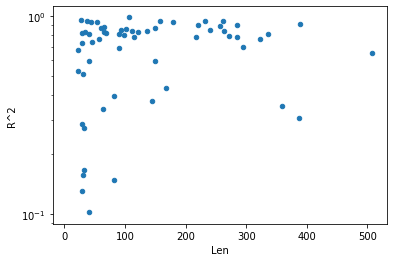

In [111]:
results.plot.scatter(x="Len", y="R^2", logy=True);

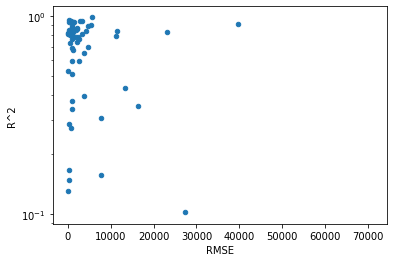

In [112]:
results.plot.scatter(x="RMSE", y="R^2", logy=True);